# ¿Cómo evoluciona la cantidad de establecimientos educacionales que operan efectivamente en Chile desde 2018 a 2022?
Fuente:
[Datos Abiertos Mineduc](https://datosabiertos.mineduc.cl/resumen-de-matricula-por-establecimiento-educacional/)

Importación de Librerías

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Cargar los datos

In [3]:
df_2022= pd.read_csv("./Resumen-matricula-EE-2022-2/20221013_Resumen_Matricula_EE_Oficial_2022_20220430_WEB.csv", sep=";")
df_2021= pd.read_csv("./Resumen-matricula-EE-2021/Resumen_Matricula_EE_Oficial_2021.csv", sep=";")
df_2020= pd.read_csv("./Resumen-matricula-EE-2020/Resumen_Matricula_EE_Oficial_2020.csv", sep=";")
df_2019= pd.read_csv("./Resumen-matricula-EE-2019/Resumen_Matricula_EE_Oficial_2019.csv", sep=";")
df_2018= pd.read_csv("./Resumen-matricula-EE-2018/Resumen_Matricula_EE_Oficial_2018.csv", sep=";")

In [4]:
df_2022.columns

Index(['AGNO', 'RBD', 'DGV_RBD', 'NOM_RBD', 'COD_DEPE', 'COD_DEPE2',
       'RURAL_RBD', 'COD_REG_RBD', 'NOM_REG_RBD_A', 'COD_PRO_RBD',
       'COD_COM_RBD', 'NOM_COM_RBD', 'COD_DEPROV_RBD', 'NOM_DEPROV_RBD',
       'ESTADO_ESTAB', 'MAT_SI_1', 'MAT_HOM_1', 'MAT_MUJ_1', 'MAT_ENS_1',
       'MAT_SI_2', 'MAT_HOM_2', 'MAT_MUJ_2', 'MAT_ENS_2', 'MAT_HOM_3',
       'MAT_MUJ_3', 'MAT_ENS_3', 'MAT_SI_4', 'MAT_HOM_4', 'MAT_MUJ_4',
       'MAT_ENS_4', 'MAT_SI_5', 'MAT_HOM_5', 'MAT_MUJ_5', 'MAT_ENS_5',
       'MAT_HOM_6', 'MAT_MUJ_6', 'MAT_ENS_6', 'MAT_HOM_7', 'MAT_MUJ_7',
       'MAT_ENS_7', 'MAT_HOM_8', 'MAT_MUJ_8', 'MAT_ENS_8', 'MAT_HOM_TOT',
       'MAT_MUJ_TOT', 'MAT_SI_TOT', 'MAT_TOTAL', 'CUR_SIM_01', 'CUR_SIM_02',
       'CUR_SIM_03', 'CUR_SIM_04', 'CUR_SIM_05', 'CUR_SIM_06', 'CUR_SIM_07',
       'CUR_SIM_08', 'CUR_SIM_TOT', 'CUR_COMB_01', 'CUR_COMB_02',
       'CUR_COMB_TOT'],
      dtype='object')

Tomando en cuenta el documento de apoyo a los datos:

ESTADO_ESTAB  -->  Estado del Establecimiento  
1: Funcionando  
2: En receso  
3: Cerrado  
4: Autorizado sin matrícula

Podemos filtrar la cantidad de establecimientos que funcionan efectivamente y ver como evoluciona a lo largo de 5 años.

In [5]:
# Lista de los dataset
data_2022_2018 = [df_2022, df_2021, df_2020, df_2019, df_2018]

# Guardamos la cantidad por año
qty_educacional_institutions_by_year_func = []

# Extraer la cantidad por año desde cada dataset
for df in data_2022_2018:
    qty_educacional_institutions_by_year_func.append(df[(df.ESTADO_ESTAB == 1)].count()[0])

years = [year for year in range(2018, 2023)]

# Guardamos la data en dataset
data_dict = {"Año":years,"Cantidad":qty_educacional_institutions_by_year_func}
df_edu_inst_by_year_func = pd.DataFrame(data_dict)


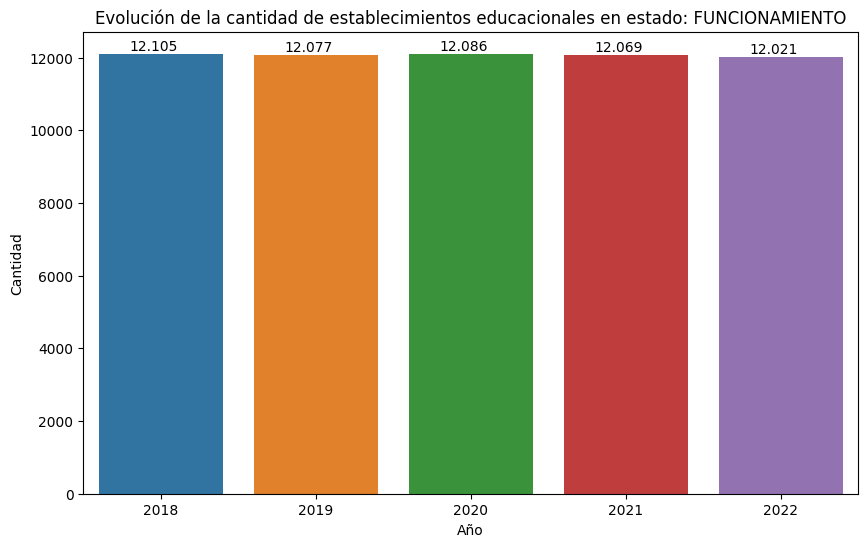

In [6]:
plt.figure(figsize=(10,6))
sns.barplot(df_edu_inst_by_year_func, x="Año", y="Cantidad")
for v, i in enumerate(df_edu_inst_by_year_func["Cantidad"]):
    plt.text(v-0.2, i+100, s="{:,}".format(i).replace(",",".") )
plt.title("Evolución de la cantidad de establecimientos educacionales en estado: FUNCIONAMIENTO")
plt.show()

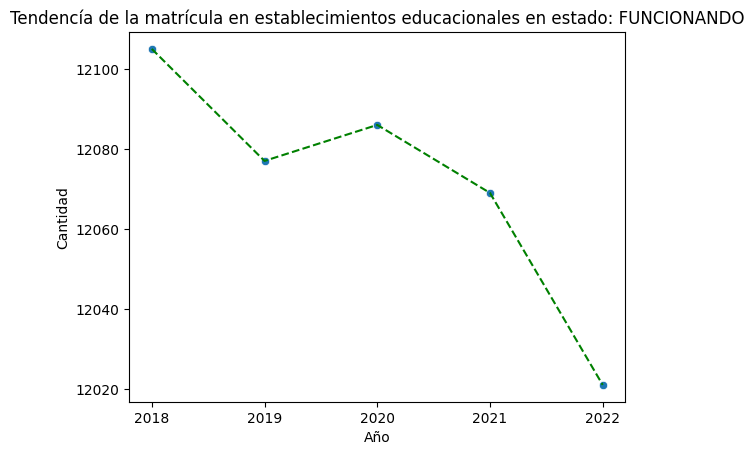

In [7]:
fig, axes = plt.subplots()
sns.lineplot(df_edu_inst_by_year_func, x="Año", y="Cantidad", linestyle="dashed", ax=axes, color="green")
sns.scatterplot(df_edu_inst_by_year_func, x="Año", y="Cantidad", ax=axes)

plt.title("Tendencía de la matrícula en establecimientos educacionales en estado: FUNCIONANDO")
plt.xticks(years)
plt.show()

## ¿Cómo evolucionan las otras categorías?

### En receso

In [8]:
# Extraer la cantidad por año desde cada dataset
qty_educacional_institutions_by_year_resc = []
for df in data_2022_2018:
    qty_educacional_institutions_by_year_resc.append(df[(df.ESTADO_ESTAB == 2)].count()[0])

years = [year for year in range(2018, 2023)]

# Guardamos la data en dataset
data_dict = {"Año":years,"Cantidad":qty_educacional_institutions_by_year_resc}
df_edu_inst_by_year_resc = pd.DataFrame(data_dict)

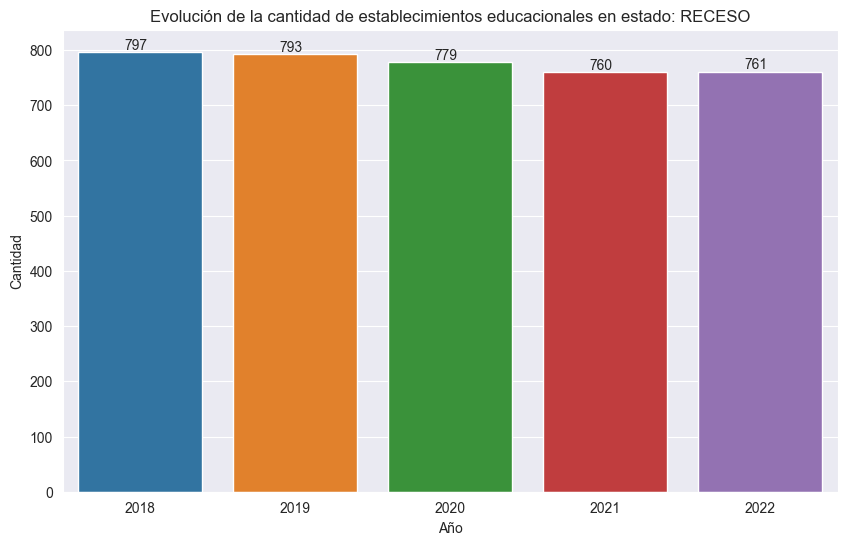

In [9]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
sns.barplot(df_edu_inst_by_year_resc, x="Año", y="Cantidad")
for v, i in enumerate(df_edu_inst_by_year_resc["Cantidad"]):
    plt.text(v-0.1, i+5, s=str(i) )
plt.title("Evolución de la cantidad de establecimientos educacionales en estado: RECESO")
plt.show()

### Cerrado

In [10]:
# Extraer la cantidad por año desde cada dataset
qty_educacional_institutions_by_year_cerr = []
for df in data_2022_2018:
    qty_educacional_institutions_by_year_cerr.append(df[(df.ESTADO_ESTAB == 3)].count()[0])

years = [year for year in range(2018, 2023)]

# Guardamos la data en dataset
data_dict = {"Año":years,"Cantidad":qty_educacional_institutions_by_year_cerr}
df_edu_inst_by_year_cerr = pd.DataFrame(data_dict)

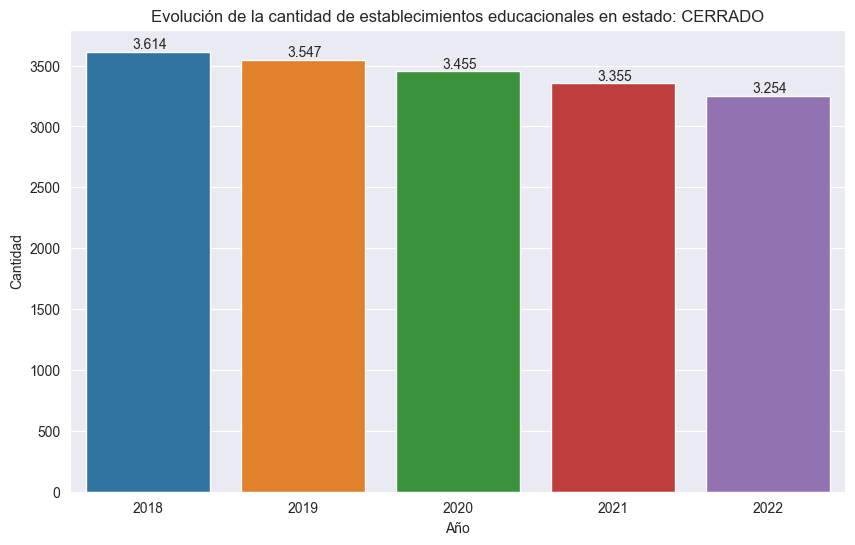

In [11]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
sns.barplot(df_edu_inst_by_year_cerr, x="Año", y="Cantidad")
for v, i in enumerate(df_edu_inst_by_year_cerr["Cantidad"]):
    plt.text(v-0.1, i+25, s="{:,}".format(i).replace(",",".") )
plt.title("Evolución de la cantidad de establecimientos educacionales en estado: CERRADO")
plt.show()

### Autorizado sin matrícula

In [12]:
# Extraer la cantidad por año desde cada dataset
qty_educacional_institutions_by_year_aut_sin_mat = []
for df in data_2022_2018:
    qty_educacional_institutions_by_year_aut_sin_mat.append(df[(df.ESTADO_ESTAB == 4)].count()[0])

years = [year for year in range(2018, 2023)]

# Guardamos la data en dataset
data_dict = {"Año":years,"Cantidad":qty_educacional_institutions_by_year_aut_sin_mat}
df_edu_inst_by_year_aut_sin_mat = pd.DataFrame(data_dict)

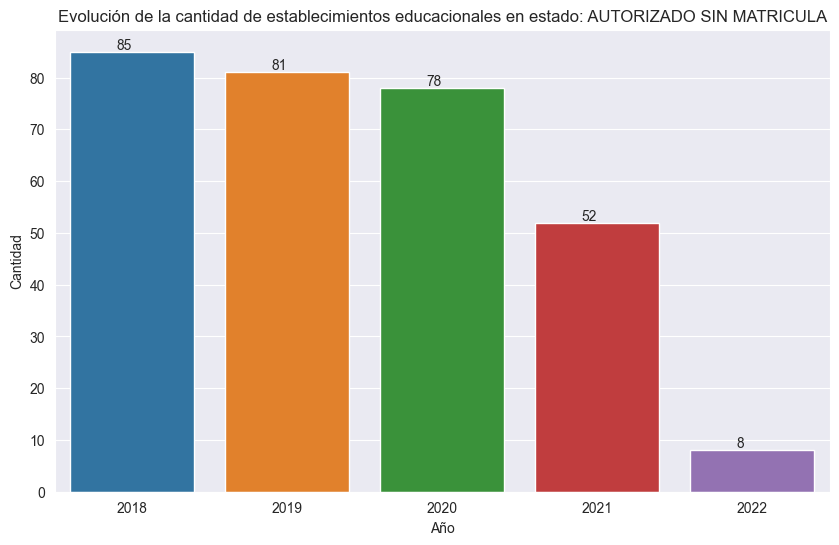

In [13]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
sns.barplot(df_edu_inst_by_year_aut_sin_mat, x="Año", y="Cantidad")
for v, i in enumerate(df_edu_inst_by_year_aut_sin_mat["Cantidad"]):
    plt.text(v-0.1, i+0.5, s=str(i) )
plt.title("Evolución de la cantidad de establecimientos educacionales en estado: AUTORIZADO SIN MATRICULA")
plt.show()

## ¿Cómo evoluciona la matrícula total en los establecimientos que se encuentran en estado FUNCIONANDO?

In [14]:
# Extraer la cantidad por año desde cada dataset
students_qty_educacional_institutions_by_year = []
for df in data_2022_2018:
    students_qty_educacional_institutions_by_year.append(df[(df.ESTADO_ESTAB == 1)].MAT_TOTAL.sum())

years = [year for year in range(2018, 2023)]

# Guardamos la data en dataset
data_dict = {"Año":years,"Matrícula":students_qty_educacional_institutions_by_year}
df_students_qty_edu_inst_by_year = pd.DataFrame(data_dict)

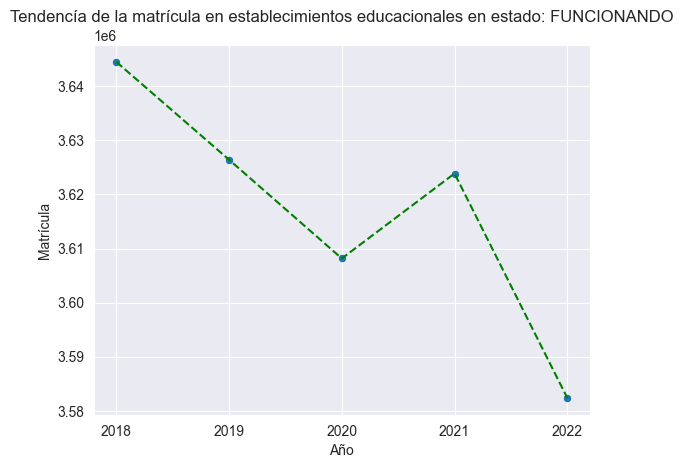

In [15]:
fig, axes = plt.subplots()
sns.lineplot(df_students_qty_edu_inst_by_year, x="Año", y="Matrícula", linestyle="dashed", ax=axes, color="green")
sns.scatterplot(df_students_qty_edu_inst_by_year, x="Año", y="Matrícula", ax=axes)
plt.title("Tendencía de la matrícula en establecimientos educacionales en estado: FUNCIONANDO")
plt.xticks(years)
plt.show()

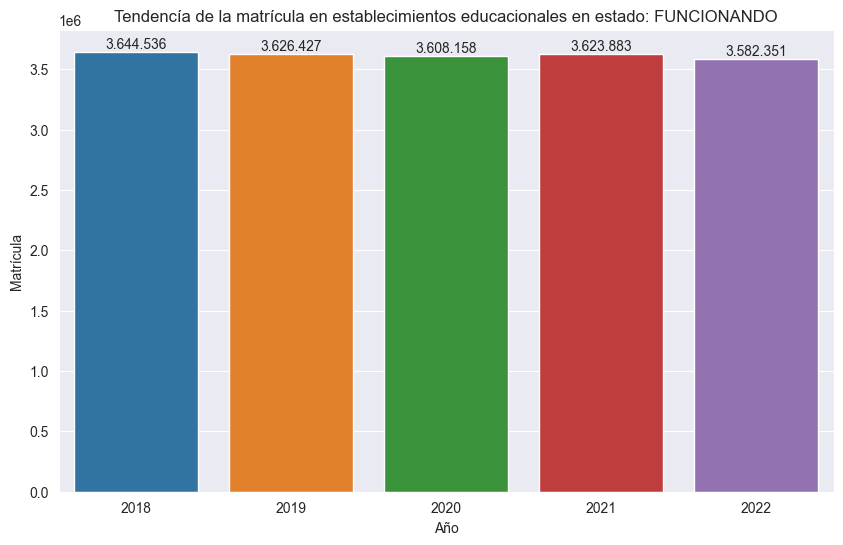

In [16]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))

sns.barplot(df_students_qty_edu_inst_by_year, x="Año", y="Matrícula")

for v, i in enumerate(df_students_qty_edu_inst_by_year["Matrícula"]):
    plt.text(v-0.2, i+10**4.5, s="{:,}".format(i).replace(",","."))

plt.title("Tendencía de la matrícula en establecimientos educacionales en estado: FUNCIONANDO")
plt.show()